#Module 5 Lab 1

# Non Linear Support Vector Machines

```
Module Coordinator : Akshit Garg
```



In [55]:
#Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go

from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix ,ConfusionMatrixDisplay
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


The topic of classifier in today's lab, SVMs make for really good linear separators. Let us look at an example which has linearly separable data:

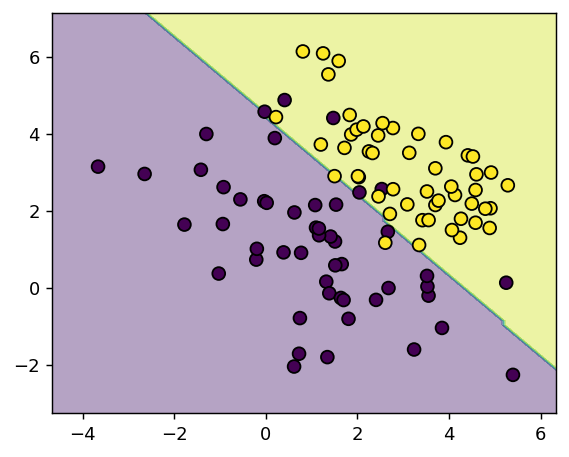

In [56]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)

  plt.show()

boundaryExp()

# The Kernel Trick

The true potential of SVMs is unleashed when they are combined with kernels.

## Kernels : An intuitive explanation

Kernel methods are essentially counting on using the training data (say $i^{th}$ example $(x_i, y_i)$ ) itself in a more straightforward way and learning a corresponding weight ($w_i$) for that example. Rather than trying to learn a fixed set of parameters which is done typically.
Depending on the kind of kernel used, we can virtually project the training data in a higher dimension to make it easier for the classifier to classify them.


<ipython-input-57-bb653c8acc51>:6: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



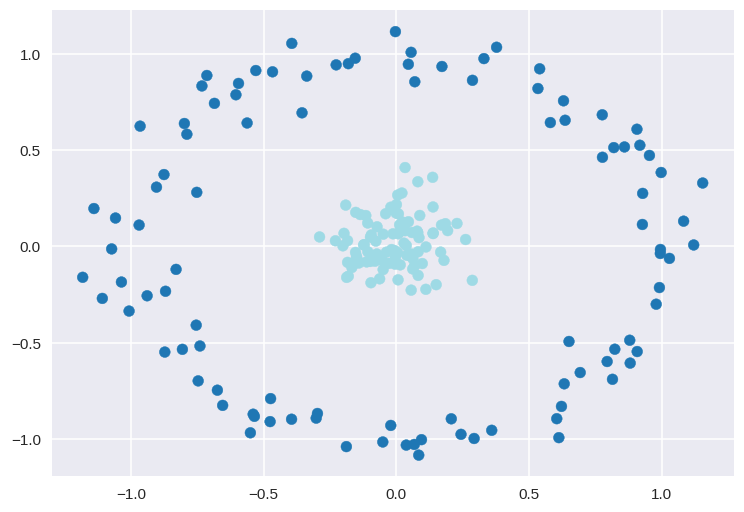

In [57]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.style.use("seaborn")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)

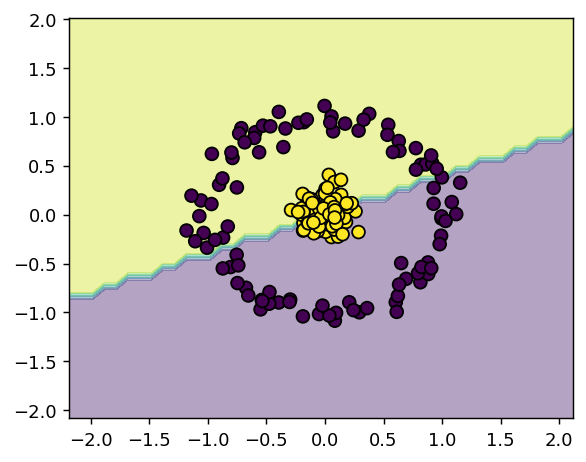

In [58]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

However, if we artificially add another dimention to the dataset of the form:

$z = x^2 + y^2$
we can clearly see a hyperplane that can distinguish both the datasets:

In [59]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [60]:
X_new = np.hstack((X, Z))

In [61]:
import plotly.graph_objects as go


In [62]:
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

That simple trick has helped us to get another dimension in which the data is linearly separable by a hyperplane (in this case, a 2d plane)

---

Now let us use the rbf kernel and use an SVM Classifier.

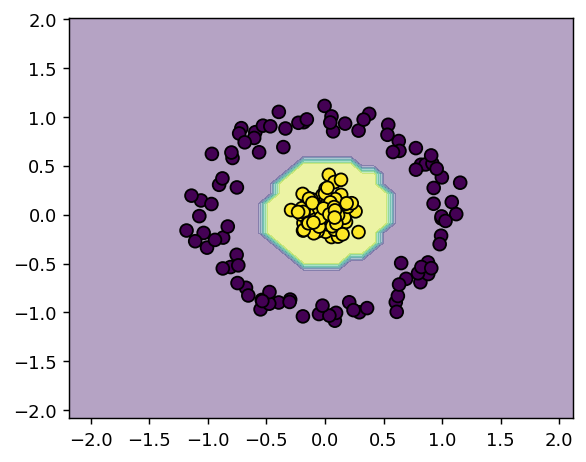

In [63]:
plt.style.use("default")
clf = svm.SVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

Now let us get back to our original dataset of iris and see if this kernel trick has helped us:

In [64]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

Accuracy of the decision tree on the test set: 

0.974




Certainly, using a kernel has increased our accuracy on the iris dataset.

1) Try to run the same experiment after filtering different features, 2 at a time.

In [65]:
def plotDecisionBoundary(X, y, pair, clf):
    x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
    y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], c=y, s=50, edgecolor='k')
    plt.title(f'Decision Boundary for Features {pair[0]} and {pair[1]}')
    plt.xlabel(f'Feature {pair[0]}')
    plt.ylabel(f'Feature {pair[1]}')
    plt.show()


In [66]:
for feature_pair in [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]:
    clf = svm.SVC(kernel='rbf')
    clf.fit(X_train[:, feature_pair], y_train)
    y_pred = clf.predict(X_test[:, feature_pair])

    accuracy = accuracy_score(y_pred, y_test)
    class_names = iris["target_names"]
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nExperiment for Features {feature_pair}:")
    print("Accuracy:", accuracy)


Experiment for Features (0, 1):
Accuracy: 0.7631578947368421

Experiment for Features (0, 2):
Accuracy: 0.9736842105263158

Experiment for Features (0, 3):
Accuracy: 0.9473684210526315

Experiment for Features (1, 2):
Accuracy: 0.9473684210526315

Experiment for Features (1, 3):
Accuracy: 0.9736842105263158

Experiment for Features (2, 3):
Accuracy: 0.9736842105263158


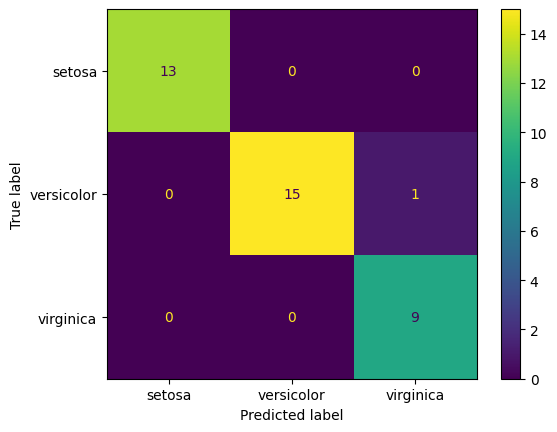

In [67]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='.0f')
plt.show()

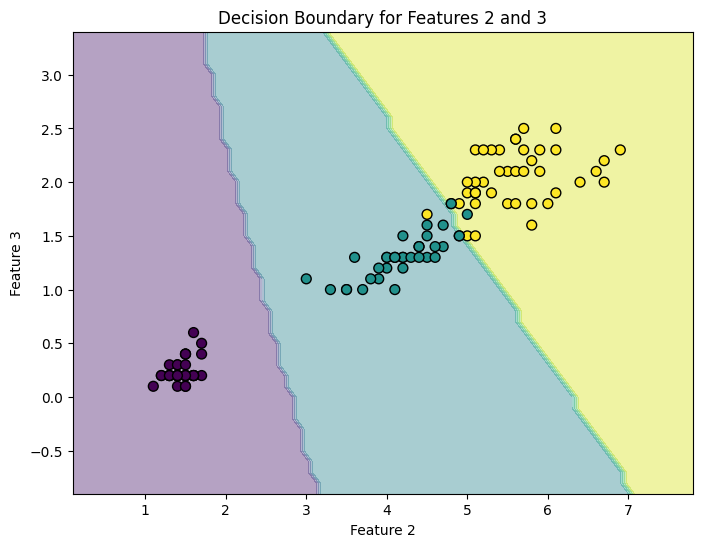

In [68]:
# Plot decision boundary
plotDecisionBoundary(X_train, y_train, feature_pair, clf)

In [69]:
def plot3DScatter(X, y, title):
    fig = go.Figure(data=[go.Scatter3d(
        x=X[:, 0],
        y=X[:, 1],
        z=X[:, 2],
        mode="markers",
        marker={
            "color": y,
            "line": {"width": 4, "color": 'DarkSlateGrey'},
            "colorscale": "viridis"},
    )])

    fig.update_layout(scene=dict(
        xaxis_title='Feature 0',
        yaxis_title='Feature 1',
        zaxis_title='Feature 2'),
        title=title
    )

    fig.show()

In [70]:
#IMP code
for feature_pair in [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]:
    # Train SVM with Linear kernel
    clf = svm.SVC(kernel='linear')
    clf.fit(X_train[:, feature_pair], y_train)

    # Use decision function to obtain signed distances to the hyperplane
    Z = clf.decision_function(X[:, feature_pair])
    Z = Z.reshape(-1, 1)  # Reshape Z to have a single column

    # Plot 3D scatter plot
    plot3DScatter(X_new, y, title=f'3D Scatter Plot with Features {feature_pair}')



2) Using different kinds of kernels for the SVM among: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

In [71]:
from sklearn.svm import SVC

In [72]:
def plotDecisionBoundary(X, y, clf, title, pair=None):
    if pair is None:
        pair = [0,1]

    x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
    y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()


In [73]:
def plotConfusionMatrix(y_true, y_pred, class_names, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Blues', values_format='.0f')
    plt.title(title)
    plt.show()

In [74]:
def plot3DScatter(X, y, title):
    fig = go.Figure(data=[go.Scatter3d(
        x=X[:, 0],
        y=X[:, 1],
        z=X[:, 2],
        mode="markers",
        marker={
            "color": y,
            "line": {"width": 4, "color": 'DarkSlateGrey'},
            "colorscale": "viridis"},
    )])

    fig.update_layout(scene=dict(
        xaxis_title='Feature 0',
        yaxis_title='Feature 1',
        zaxis_title='Feature 2'),
        title=title
    )

    fig.show()

A)POLYNOMIAL KERNEL

In [75]:

X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Create and train the SVC model
clf_poly_2d = SVC(kernel='poly', degree=3)
clf_poly_2d.fit(X_train_2d, y_train)

# Make predictions on the 2D test set
y_pred_poly_2d = clf_poly_2d.predict(X_test_2d)

In [76]:
plot3DScatter(X_train, y_train, 'Scatter Plot with Polynomial Kernel')


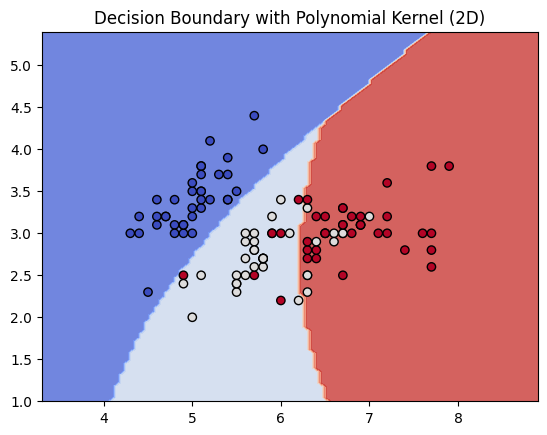

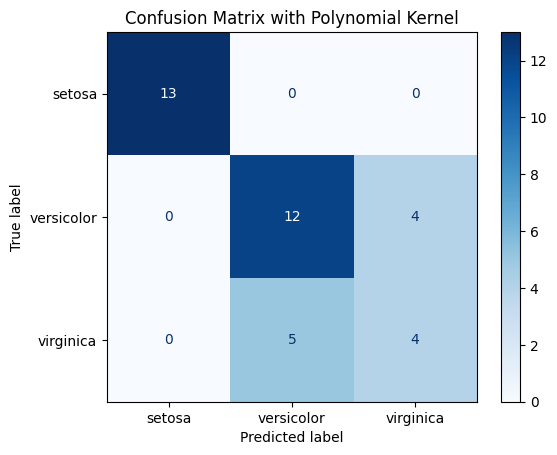

Accuracy with Polynomial Kernel: 0.763


In [77]:

# Plot decision boundary
plotDecisionBoundary(X_train_2d, y_train, clf_poly_2d, 'Decision Boundary with Polynomial Kernel (2D)')

# Plot confusion matrix
plotConfusionMatrix(y_test, y_pred_poly_2d, class_names, 'Confusion Matrix with Polynomial Kernel')

# Calculate accuracy
accuracy_poly = accuracy_score(y_test, y_pred_poly_2d)
print(f'Accuracy with Polynomial Kernel: {accuracy_poly:.3f}')

B)RBF KERNEL

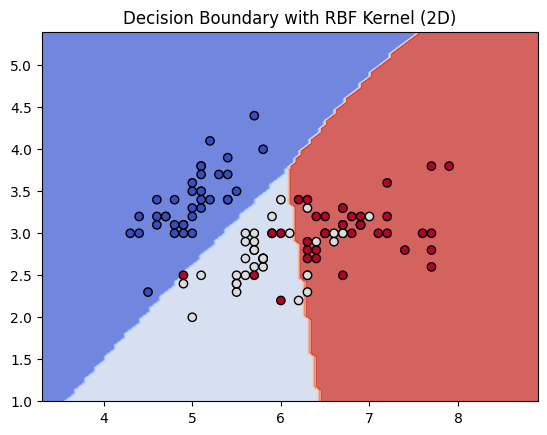

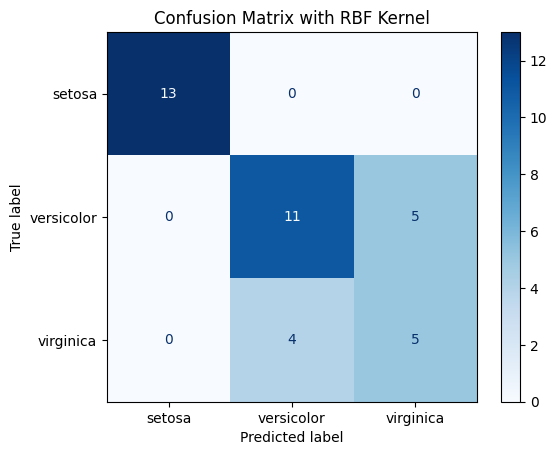

Accuracy with RBF Kernel: 0.763


In [78]:
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X_train_2d, y_train)

# Make predictions on the 2D test set
y_pred_rbf = clf_rbf.predict(X_test_2d)

# Plot decision boundary for RBF kernel
plotDecisionBoundary(X_train_2d, y_train, clf_rbf, 'Decision Boundary with RBF Kernel (2D)')

# Plot confusion matrix for RBF kernel
plotConfusionMatrix(y_test, y_pred_rbf, class_names, 'Confusion Matrix with RBF Kernel')

# Calculate accuracy for RBF kernel
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'Accuracy with RBF Kernel: {accuracy_rbf:.3f}')



C) SIGMOID KERNEL

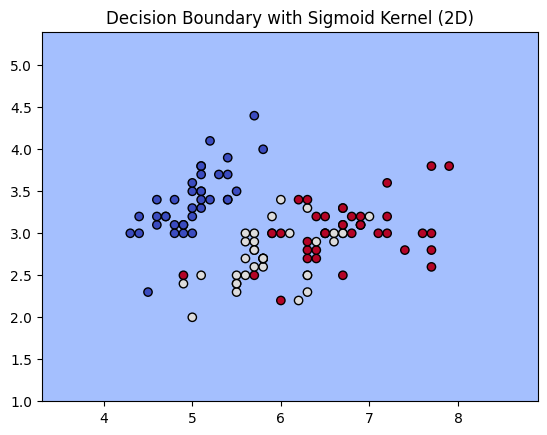

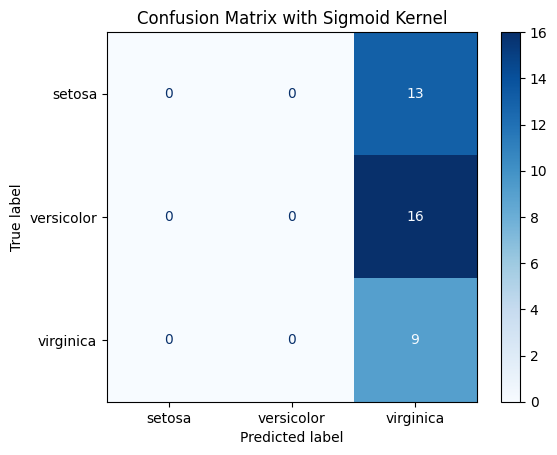

Accuracy with Sigmoid Kernel: 0.237


In [79]:
clf_sigmoid = SVC(kernel='sigmoid')
clf_sigmoid.fit(X_train_2d, y_train)

# Make predictions on the 2D test set
y_pred_sigmoid = clf_sigmoid.predict(X_test_2d)

# Plot decision boundary for Sigmoid kernel
plotDecisionBoundary(X_train_2d, y_train, clf_sigmoid, 'Decision Boundary with Sigmoid Kernel (2D)')

# Plot confusion matrix for Sigmoid kernel
plotConfusionMatrix(y_test, y_pred_sigmoid, class_names, 'Confusion Matrix with Sigmoid Kernel')

# Calculate accuracy for Sigmoid kernel
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print(f'Accuracy with Sigmoid Kernel: {accuracy_sigmoid:.3f}')

4)PRECOMPUTED KERNEL

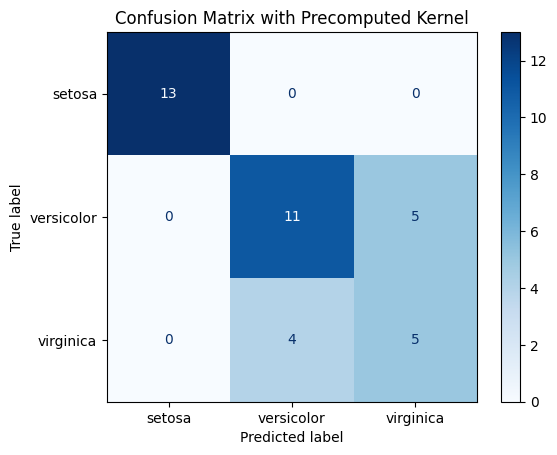

Accuracy with Precomputed Kernel: 0.763


In [80]:
# Compute the Gram matrix
gram_matrix_train = np.dot(X_train_2d, X_train_2d.T)
gram_matrix_test = np.dot(X_test_2d, X_train_2d.T)

# Create and train the SVC model with precomputed kernel
clf_precomputed = SVC(kernel='precomputed')
clf_precomputed.fit(gram_matrix_train, y_train)

# Make predictions on the test set using the Gram matrix
y_pred_precomputed = clf_precomputed.predict(gram_matrix_test)

# Plot confusion matrix for Precomputed kernel
plotConfusionMatrix(y_test, y_pred_precomputed, class_names, 'Confusion Matrix with Precomputed Kernel')

# Calculate accuracy for Precomputed kernel
accuracy_precomputed = accuracy_score(y_test, y_pred_precomputed)
print(f'Accuracy with Precomputed Kernel: {accuracy_precomputed:.3f}')

**INFERENCES FROM TASK-1 :**

* Notably, the model performs poorly when using features (0, 1) but achieves higher accuracies when other features are included.
*  In some cases (e.g., (0, 2) and (1, 3)), the accuracy remains high, indicating that the model can capture relevant information even with a reduced set of features. This suggests the potential for dimensionality reduction techniques.
* Features (0, 2), (1, 3), and (2, 3) consistently lead to high accuracies,
suggesting that these pairs might contain more discriminatory information for the model.